Test for reading from the vowel dataset.

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
import scipy.io
import scipy.io.wavfile

v = "breathy_a_120hz_1000pa"

wavdata = scipy.io.wavfile.read("vowel/" + v + ".wav")
matdata = scipy.io.loadmat("vowel/" + v + ".mat")

fs, s = wavdata
s = s/np.max(np.abs(s))

gf = np.squeeze(matdata['glottal_flow'])
gf = gf/np.max(np.abs(gf))

t = np.arange(len(s))/fs*1000 # msec

Because the microphone distance was apparently simulated too, the observed $s(t)$ lags behind the $u(t)$ ground truth, so we need to align them with each other. This only is necessary because we know the ground truth, similar to how we have to shift DEGG signals.

This is not necessary with ordinary analysis (like with TIMIT wav files), because we then ignore the microphone distance and simply assume that $s(t)$ is directly measured at the lips such that $s = u*h*r$ applies, such that $s$ and $u$ are aligned.

Note that
```
plot(t + delay, s, label="s") # "Move s to when it exited at the lips"
plot(t, gf, label="gf")
```
is equivalent to
```
plot(t, s, label="s")
plot(t - delay, gf, label="gf") # "Move the gf to the microphone"
```

In [5]:
delay = 0.65 # msec -- due to simulated microphone at 22cm from lips, see paper

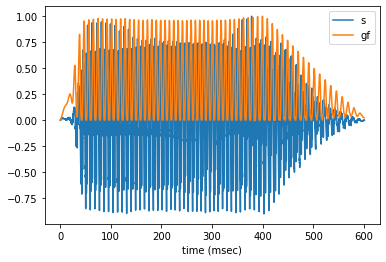

In [6]:
plot(t + delay, s, label="s")
plot(t, gf, label="gf")
xlabel("time (msec)")
legend();

In the below plot, you can see how sometimes the GCI moment is actually *NOT* where you'd think it is. It is more towards the place we have seen BNGIF place it. So our model was more closer to the truth than us.

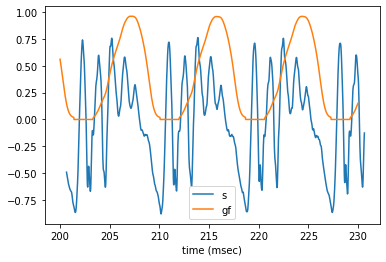

In [7]:
mask = (200 < t) & (t < 230)

plot(t[mask] + delay, s[mask], label="s")
plot(t[mask], gf[mask], label="gf")
xlabel("time (msec)")
legend();